In [1]:
import sys
from importlib import reload 
sys.path.append('./lib')

In [2]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [3]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [4]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [5]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [7]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("euclidian", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("euclidian_corrected", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_2(for_ranking=True):
    # + not-ranking  (not-corrected euclidean version)
    return [
        ProductDistances([
            (10, Distances("euclidian", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("euclidian_corrected", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]

def make_distances_3():
    return [
        ProductDistances([
            (11, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (6, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_exp_dot(k=1):
    return [
        ProductDistances([
            (10, Distances("exp_minus_dot", scalable=True))
        ], "sum")
        for _ in range(k)
    ]


def make_distances_4():
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
    ]

_____________


### USCA312 fake product spaces example
**(no exponential map, just default gradients & adam optimizer)**

In [8]:
_, distances_matrix = utils.get_dataset("usca312")

Loading from ../datasets/usca312.edges


In [9]:
distances_matrix

array([[0.   , 1.167, 1.579, ..., 1.209, 0.866, 1.112],
       [1.167, 0.   , 0.413, ..., 0.045, 1.904, 0.082],
       [1.579, 0.413, 0.   , ..., 0.37 , 2.312, 0.467],
       ...,
       [1.209, 0.045, 0.37 , ..., 0.   , 1.95 , 0.107],
       [0.866, 1.904, 2.312, ..., 1.95 , 0.   , 1.87 ],
       [1.112, 0.082, 0.467, ..., 0.107, 1.87 , 0.   ]])

In [10]:
d = make_model()
qs = d.sparse_arange(312)  # queries
r_matrix = np.mean(distances_matrix <= 1.)  # not used
distances_matrix.shape

(312, 312)

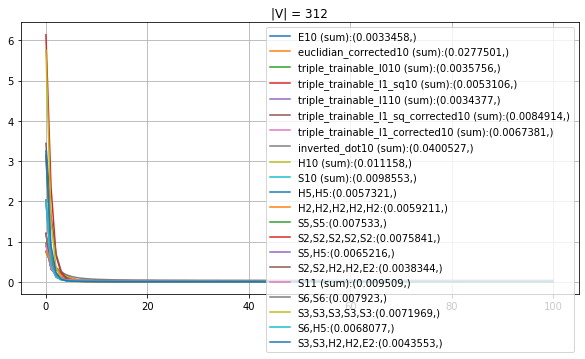


0.0033458	E10 (sum)
0.0277501	euclidian_corrected10 (sum)
0.0035756	triple_trainable_l010 (sum)
0.0053106	triple_trainable_l1_sq10 (sum)
0.0034377	triple_trainable_l110 (sum)
0.0084914	triple_trainable_l1_sq_corrected10 (sum)
0.0067381	triple_trainable_l1_corrected10 (sum)
0.0400527	inverted_dot10 (sum)
0.011158	H10 (sum)
0.0098553	S10 (sum)
0.0057321	H5,H5
0.0059211	H2,H2,H2,H2,H2
0.007533	S5,S5
0.0075841	S2,S2,S2,S2,S2
0.0065216	S5,H5
0.0038344	S2,S2,H2,H2,E2
0.009509	S11 (sum)
0.007923	S6,S6
0.0071969	S3,S3,S3,S3,S3
0.0068077	S6,H5
0.0043553	S3,S3,H2,H2,E2


In [11]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances_2() + make_distances_3(), 2000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

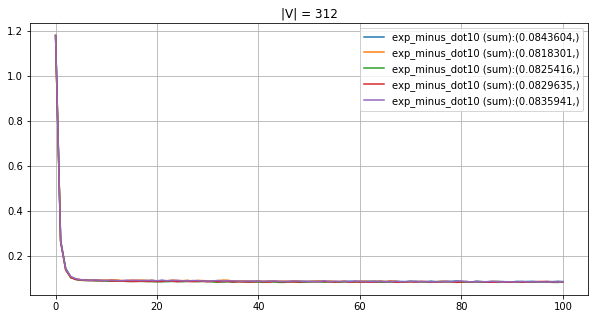


0.0843604	exp_minus_dot10 (sum)
0.0818301	exp_minus_dot10 (sum)
0.0825416	exp_minus_dot10 (sum)
0.0829635	exp_minus_dot10 (sum)
0.0835941	exp_minus_dot10 (sum)


key	val	std	runs
exp_minus_dot10 (sum)	0.08305794	0.0008679846279744817	5


In [11]:
ci = utils.calc_ci_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    dists=make_distances_exp_dot(5), iters=2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

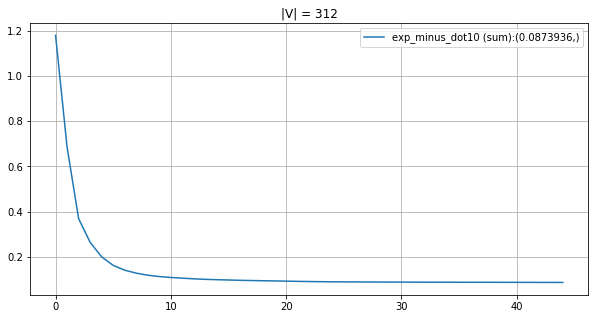

In [ ]:
ci = utils.calc_ci_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    dists=make_distances_exp_dot(1), iters=2000, learning_rate=0.01,  # does LR matter?
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [11]:
def get_dists_for_ci_():
    return [make_distances_2()[0]] + make_distances_2()[2:5]

def get_dists_for_ci(x):
    d = list()
    for _ in range(x):
        d += get_dists_for_ci_()
    return d

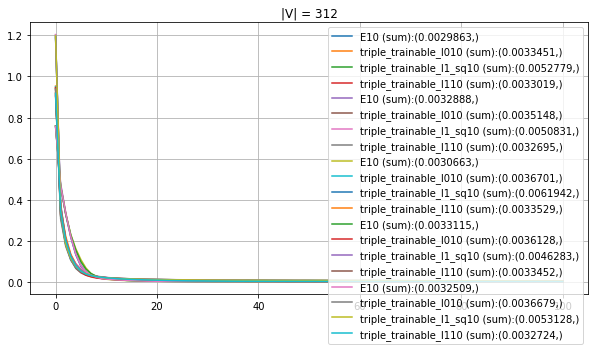


0.0029863	E10 (sum)
0.0033451	triple_trainable_l010 (sum)
0.0052779	triple_trainable_l1_sq10 (sum)
0.0033019	triple_trainable_l110 (sum)
0.0032888	E10 (sum)
0.0035148	triple_trainable_l010 (sum)
0.0050831	triple_trainable_l1_sq10 (sum)
0.0032695	triple_trainable_l110 (sum)
0.0030663	E10 (sum)
0.0036701	triple_trainable_l010 (sum)
0.0061942	triple_trainable_l1_sq10 (sum)
0.0033529	triple_trainable_l110 (sum)
0.0033115	E10 (sum)
0.0036128	triple_trainable_l010 (sum)
0.0046283	triple_trainable_l1_sq10 (sum)
0.0033452	triple_trainable_l110 (sum)
0.0032509	E10 (sum)
0.0036679	triple_trainable_l010 (sum)
0.0053128	triple_trainable_l1_sq10 (sum)
0.0032724	triple_trainable_l110 (sum)


key	val	std	runs
E10 (sum)	0.00318076	0.00013007766295563595	5
triple_trainable_l010 (sum)	0.0035621399999999997	0.0001222738009550696	5
triple_trainable_l1_sq10 (sum)	0.00529926	0.0005096017370457052	5
triple_trainable_l110 (sum)	0.0033083799999999997	3.517370608849741e-05	5


In [12]:
ci = utils.calc_ci_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    dists=get_dists_for_ci(5), iters=2000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [14]:
0.00318076+0.00013007766295563595*3

0.003570992988866908

__________________

# CS PhDs

In [14]:
G, distances_matrix = utils.get_dataset(distances_matrix=True)

Loading from ../datasets/CSPhDs.edges
|V| = 1025, |E| = 1043


In [15]:
def make_model_g(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = np.mean(distances_matrix <= 1.)
distances_matrix.shape

(1025, 1025)

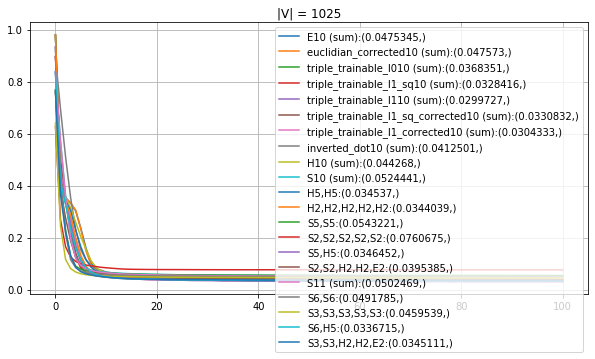


0.0475345	E10 (sum)
0.047573	euclidian_corrected10 (sum)
0.0368351	triple_trainable_l010 (sum)
0.0328416	triple_trainable_l1_sq10 (sum)
0.0299727	triple_trainable_l110 (sum)
0.0330832	triple_trainable_l1_sq_corrected10 (sum)
0.0304333	triple_trainable_l1_corrected10 (sum)
0.0412501	inverted_dot10 (sum)
0.044268	H10 (sum)
0.0524441	S10 (sum)
0.034537	H5,H5
0.0344039	H2,H2,H2,H2,H2
0.0543221	S5,S5
0.0760675	S2,S2,S2,S2,S2
0.0346452	S5,H5
0.0395385	S2,S2,H2,H2,E2
0.0502469	S11 (sum)
0.0491785	S6,S6
0.0459539	S3,S3,S3,S3,S3
0.0336715	S6,H5
0.0345111	S3,S3,H2,H2,E2


In [16]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    make_distances_2() + make_distances_3(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

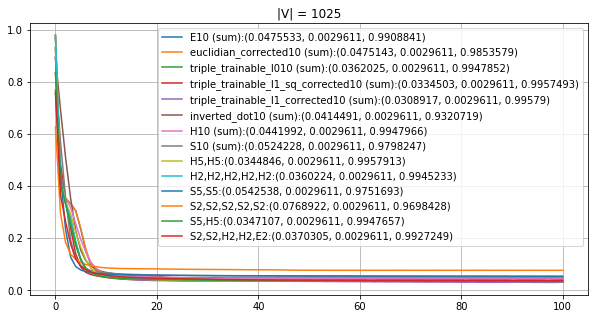

In [44]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    make_distances(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20
)

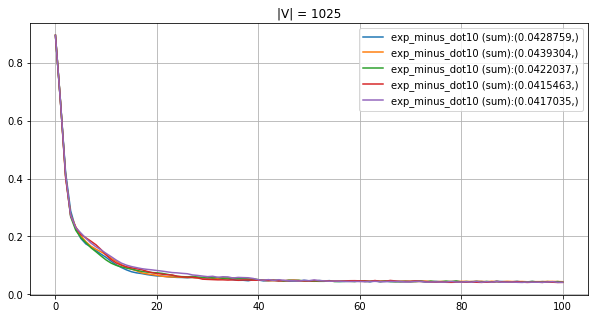


0.0428759	exp_minus_dot10 (sum)
0.0439304	exp_minus_dot10 (sum)
0.0422037	exp_minus_dot10 (sum)
0.0415463	exp_minus_dot10 (sum)
0.0417035	exp_minus_dot10 (sum)


key	val	std	runs
exp_minus_dot10 (sum)	0.042451960000000004	0.0008726460212480211	5


In [17]:
ci = utils.calc_ci_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists=make_distances_exp_dot(5), iters=2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

__________________

# POWER

In [18]:
G, distances_matrix = utils.get_dataset("power", distances_matrix=True)

Loading from ../datasets/power.edges
|V| = 4941, |E| = 6594


In [19]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = np.mean(distances_matrix <= 1.)
distances_matrix.shape

(4941, 4941)

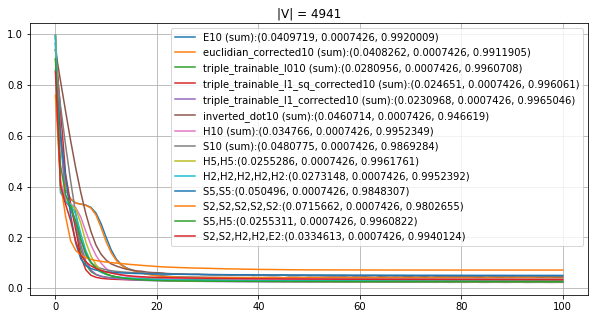

In [10]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    make_distances(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20
)

In [21]:
for d, l in zip(make_distances(), total_loss_story):
    print(f"{l[-1][0]}\t{d}")

0.0409719	E10 (sum)
0.0408262	euclidian_corrected10 (sum)
0.0280956	triple_trainable_l010 (sum)
0.024651	triple_trainable_l1_sq_corrected10 (sum)
0.0230968	triple_trainable_l1_corrected10 (sum)
0.0460714	inverted_dot10 (sum)
0.034766	H10 (sum)
0.0480775	S10 (sum)
0.0255286	H5,H5
0.0273148	H2,H2,H2,H2,H2
0.050496	S5,S5
0.0715662	S2,S2,S2,S2,S2
0.0255311	S5,H5
0.0334613	S2,S2,H2,H2,E2


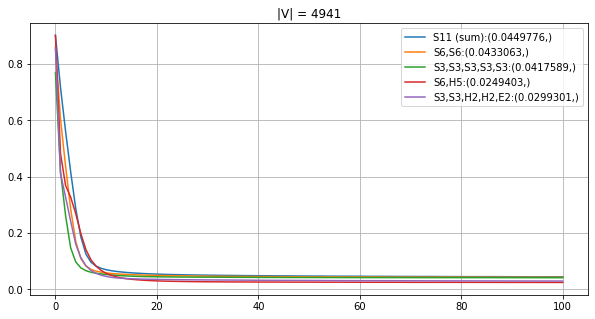


0.0449776	S11 (sum)
0.0433063	S6,S6
0.0417589	S3,S3,S3,S3,S3
0.0249403	S6,H5
0.0299301	S3,S3,H2,H2,E2


In [20]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g2, qs, distances_matrix, r_matrix,
    make_distances_3(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

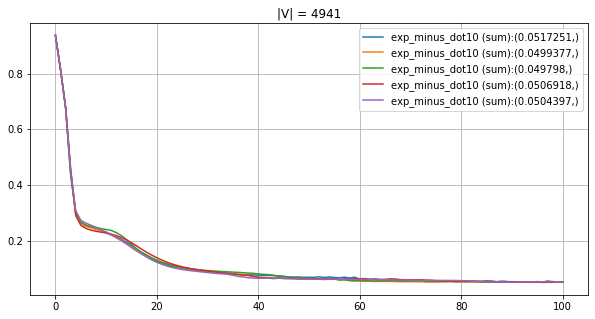


0.0517251	exp_minus_dot10 (sum)
0.0499377	exp_minus_dot10 (sum)
0.049798	exp_minus_dot10 (sum)
0.0506918	exp_minus_dot10 (sum)
0.0504397	exp_minus_dot10 (sum)


key	val	std	runs
exp_minus_dot10 (sum)	0.05051846	0.0006853575376400268	5


In [20]:
ci = utils.calc_ci_distortion(
    make_model_g2, qs, distances_matrix, r_matrix,
    dists=make_distances_exp_dot(5), iters=2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

_______________________

# Facebook

In [29]:
G, distances_matrix = utils.get_dataset("facebook", distances_matrix=True)

Loading from ../datasets/facebook.edges
|V| = 4039, |E| = 88234


In [30]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = 1. * (distances_matrix <= 1.)
distances_matrix.shape

(4039, 4039)

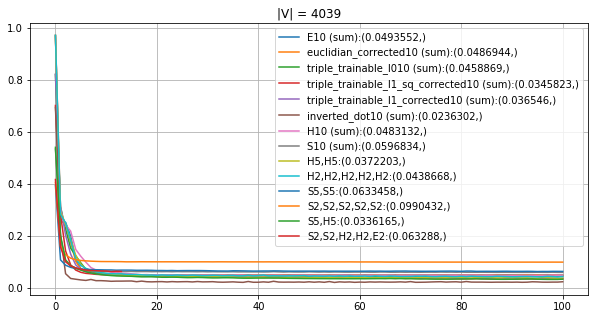

261:0.06383006248844574
262:0.06252516037384293
263:0.062164350405456814
264:0.06319063928373572
265:0.06349697374442197
266:0.06256565513259776
267:0.062000605218557006
268:0.06268463118633631
269:0.06364328074178412
270:0.06273528915719173


In [ ]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    make_distances(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

In [21]:
for d, l in zip(make_distances(), total_loss_story):
    print(f"{l[-1][0]}\t{d}")

0.0493552	E10 (sum)
0.0486944	euclidian_corrected10 (sum)
0.0458869	triple_trainable_l010 (sum)
0.0345823	triple_trainable_l1_sq_corrected10 (sum)
0.036546	triple_trainable_l1_corrected10 (sum)
0.0236302	inverted_dot10 (sum)
0.0483132	H10 (sum)
0.0596834	S10 (sum)
0.0372203	H5,H5
0.0438668	H2,H2,H2,H2,H2
0.0633458	S5,S5
0.0990432	S2,S2,S2,S2,S2
0.0336165	S5,H5
0.0576727	S2,S2,H2,H2,E2


In [24]:
### connection failure, the true image was saved in ./pngs/distortion-V-4039--2020-02-14-19h.png

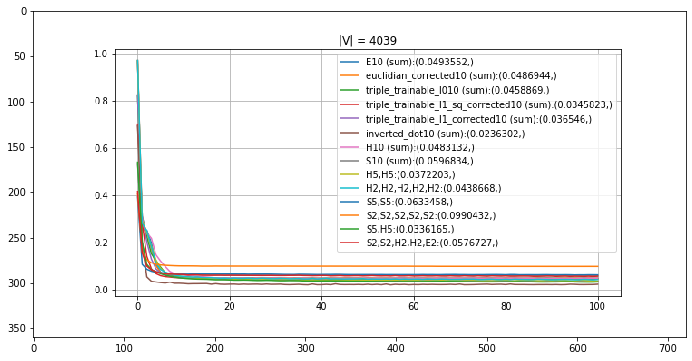

In [34]:
import matplotlib.image as mpimg
img=mpimg.imread('./pngs/distortion-V-4039--2020-02-14-19h.png')
plt.figure(figsize=(12, 6))
imgplot = plt.imshow(img)
plt.show()

In [35]:
# or

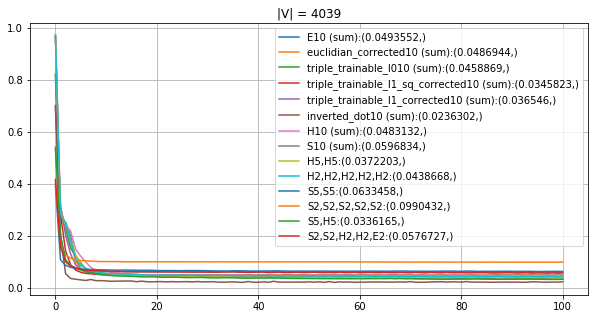

In [38]:
dists = make_distances()
plt.figure(figsize=(10, 5))
plt.title(f"|V| = {qs.shape[0]}")
for i, prev_loss_story in enumerate(total_loss_story):
    plt.plot([x[0] for x in prev_loss_story], label=f"{dists[i]}:{prev_loss_story[-1]}")
plt.legend()
plt.grid()
clear_output()
plt.show()

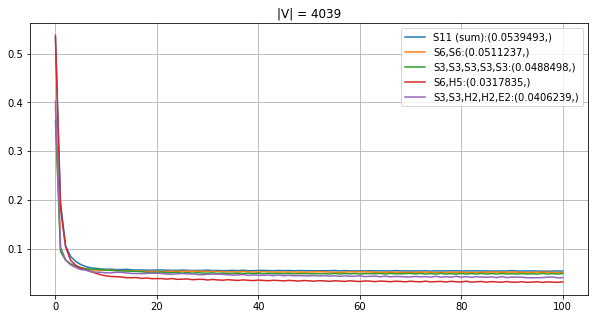


0.0539493	S11 (sum)
0.0511237	S6,S6
0.0488498	S3,S3,S3,S3,S3
0.0317835	S6,H5
0.0406239	S3,S3,H2,H2,E2


In [23]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g2, qs, distances_matrix, r_matrix,
    make_distances_3(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

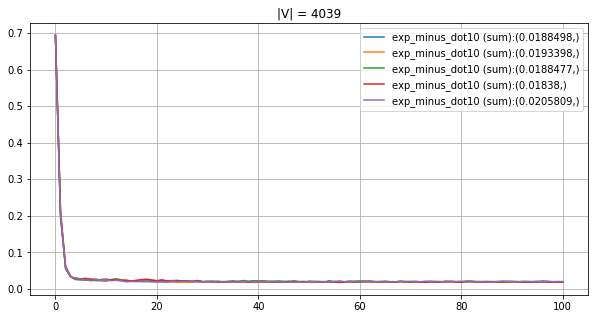


0.0188498	exp_minus_dot10 (sum)
0.0193398	exp_minus_dot10 (sum)
0.0188477	exp_minus_dot10 (sum)
0.01838	exp_minus_dot10 (sum)
0.0205809	exp_minus_dot10 (sum)


key	val	std	runs
exp_minus_dot10 (sum)	0.019199639999999997	0.0007543982412492752	5


In [23]:
ci = utils.calc_ci_distortion(
    make_model_g2, qs, distances_matrix, r_matrix,
    dists=make_distances_exp_dot(5), iters=2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

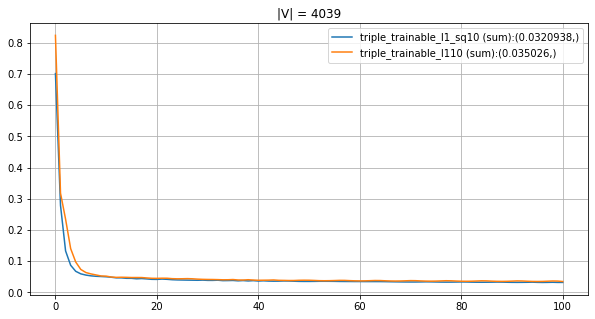

0.0320938	triple_trainable_l1_sq10 (sum)
0.035026	triple_trainable_l110 (sum)


In [37]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g2, qs, distances_matrix, r_matrix,
    make_distances_4(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

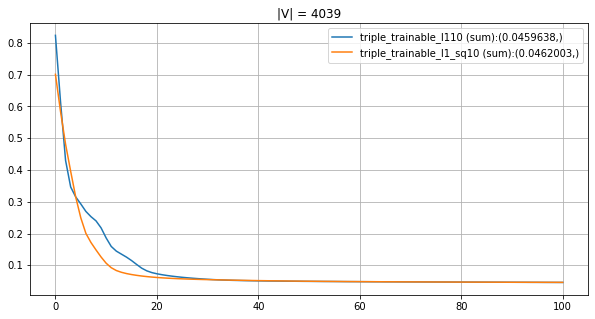

0.0459638	triple_trainable_l110 (sum)
0.0462003	triple_trainable_l1_sq10 (sum)


In [40]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g2, qs, distances_matrix, r_matrix,
    make_distances_4()[::-1], 2000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

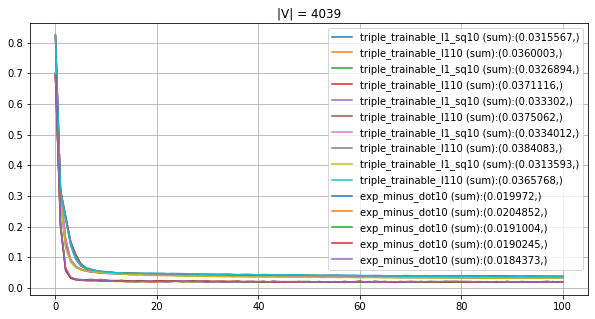

0.0315567	triple_trainable_l1_sq10 (sum)
0.0360003	triple_trainable_l110 (sum)
0.0326894	triple_trainable_l1_sq10 (sum)
0.0371116	triple_trainable_l110 (sum)
0.033302	triple_trainable_l1_sq10 (sum)
0.0375062	triple_trainable_l110 (sum)
0.0334012	triple_trainable_l1_sq10 (sum)
0.0384083	triple_trainable_l110 (sum)
0.0313593	triple_trainable_l1_sq10 (sum)
0.0365768	triple_trainable_l110 (sum)
0.019972	exp_minus_dot10 (sum)
0.0204852	exp_minus_dot10 (sum)
0.0191004	exp_minus_dot10 (sum)
0.0190245	exp_minus_dot10 (sum)
0.0184373	exp_minus_dot10 (sum)


key	val	std	runs
triple_trainable_l1_sq10 (sum)	0.03246172	0.000857312357078795	5
triple_trainable_l110 (sum)	0.037120639999999996	0.000819479123834159	5
exp_minus_dot10 (sum)	0.019403880000000002	0.0007297012358493025	5


In [38]:
ddd = list()
for _ in range(5):
    ddd += make_distances_4()
ddd += make_distances_exp_dot(5)

ci = utils.calc_ci_distortion(
    make_model_g2, qs, distances_matrix, r_matrix,
    dists=ddd, iters=2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

______________________
## Wiki 
### aka WLA6 - bfs on Wikipedia categories from Linear Algebra, depth = 6

In [41]:
# !cp wiki.edges ../datasets/wla6.edges
# !cp wiki.nodes ../datasets/wla6.nodes

In [42]:
!head ../datasets/wla6.edges -n 3
!echo 
!head ../datasets/wla6.nodes -n 4

0	1
0	2
0	3

linear algebra
convex geometry
determinants
invariant subspaces


In [43]:
G, distances_matrix = utils.get_dataset("wla6", distances_matrix=True)

Loading from ../datasets/wla6.edges
|V| = 3227, |E| = 3604


In [44]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = 1. * (distances_matrix <= 1.)
distances_matrix.shape

(3227, 3227)

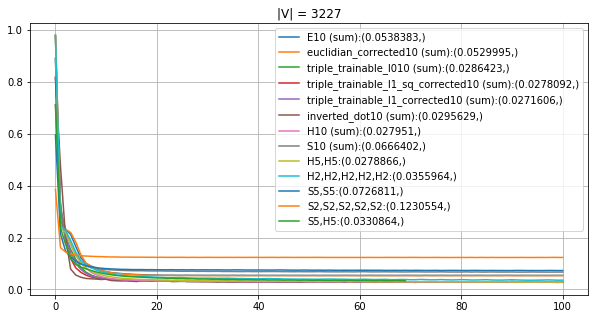

1381:0.03350930526483905
1382:0.034010723332316625
1383:0.03394286558006354
1384:0.03335731528090014
1385:0.033030270038181465


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    make_distances(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

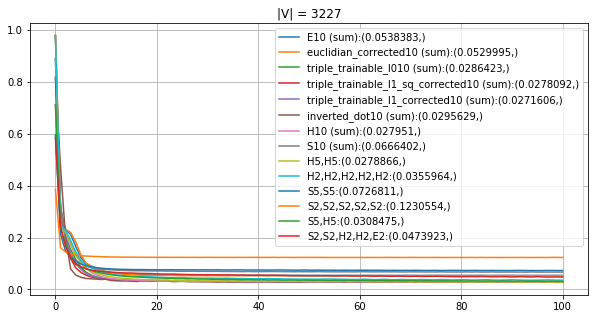

In [23]:
dists = make_distances()
plt.figure(figsize=(10, 5))
plt.title(f"|V| = {qs.shape[0]}")
for i, prev_loss_story in enumerate(total_loss_story):
    plt.plot([x[0] for x in prev_loss_story], label=f"{dists[i]}:{prev_loss_story[-1]}")
plt.legend()
plt.grid()
clear_output()
plt.show()

In [22]:
for d, l in zip(make_distances(), total_loss_story):
    print(f"{l[-1][0]}\t{d}")

0.0538383	E10 (sum)
0.0529995	euclidian_corrected10 (sum)
0.0286423	triple_trainable_l010 (sum)
0.0278092	triple_trainable_l1_sq_corrected10 (sum)
0.0271606	triple_trainable_l1_corrected10 (sum)
0.0295629	inverted_dot10 (sum)
0.027951	H10 (sum)
0.0666402	S10 (sum)
0.0278866	H5,H5
0.0355964	H2,H2,H2,H2,H2
0.0726811	S5,S5
0.1230554	S2,S2,S2,S2,S2
0.0308475	S5,H5
0.0473923	S2,S2,H2,H2,E2


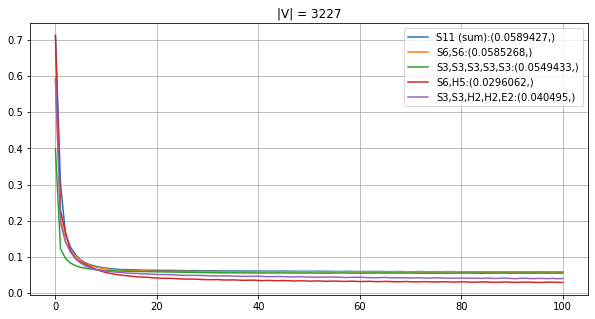


0.0589427	S11 (sum)
0.0585268	S6,S6
0.0549433	S3,S3,S3,S3,S3
0.0296062	S6,H5
0.040495	S3,S3,H2,H2,E2


In [28]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g2, qs, distances_matrix, r_matrix,
    make_distances_3(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

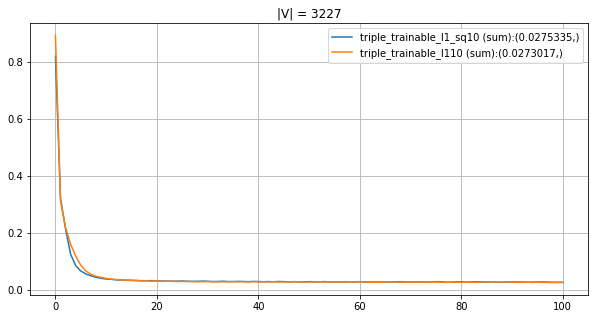

0.0275335	triple_trainable_l1_sq10 (sum)
0.0273017	triple_trainable_l110 (sum)


In [48]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g2, qs, distances_matrix, r_matrix,
    make_distances_4(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

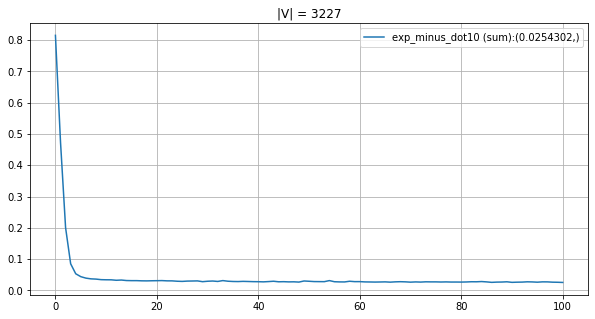


0.0254302	exp_minus_dot10 (sum)


In [12]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g2, qs, distances_matrix, r_matrix,
    make_distances_exp_dot(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [17]:
total_loss_story[0][-1][0]

0.0254302

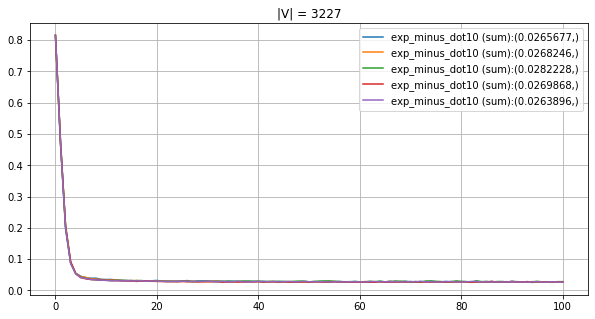


0.0265677	exp_minus_dot10 (sum)
0.0268246	exp_minus_dot10 (sum)
0.0282228	exp_minus_dot10 (sum)
0.0269868	exp_minus_dot10 (sum)
0.0263896	exp_minus_dot10 (sum)


key	val	std	runs
exp_minus_dot10 (sum)	0.026998299999999996	0.000645853890597556	5


In [50]:
ci = utils.calc_ci_distortion(
    make_model_g2, qs, distances_matrix, r_matrix,
    dists=make_distances_exp_dot(5), iters=2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [64]:
v = ci["exp_minus_dot10 (sum)"]
np.mean(v) - np.std(v) * 3, np.mean(v) + np.std(v) * 3

(0.02506073832820733, 0.028935861671792663)

In [28]:
round(0.026998299999999996, 5)

0.027